<a href="https://colab.research.google.com/github/changsksu/IMSE_Data_Science/blob/main/One_Way_ANOVA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This Python notebook demonstrate the computation of One-Way ANOVA. The example is from Montgomery Intro to SQC (7th ed chap 4). Paper strength by hardwood concentration. Ref.
https://www.pythonfordatascience.org/anova-python/ 

In [33]:
import math
import statistics
import numpy as np
import scipy.stats
from scipy import stats
from scipy.stats import f_oneway
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as mc

In [7]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
#the 2nd read option assume that the data file is rignt under your default google drive directory
data = pd.read_csv('drive/My Drive/Colab Notebooks/IMSE_Data_Science/Data/paper_strength.csv', sep=',', na_values=".")

data  

,Obs,Conc,Strength
0,1,5,7
1,2,5,8
2,3,5,15
3,4,5,11
4,5,5,9
5,6,5,10
6,1,10,12
7,2,10,17
8,3,10,13
9,4,10,18


In [17]:
# filter out 5% hardwood concentration and validate it
Conc5=data[data['Conc']==5]['Strength']
Conc5

0     7
1     8
2    15
3    11
4     9
5    10
Name: Strength, dtype: int64

In [37]:
# another way for filtering
testdata=data['Strength'][data['Conc'] == 5]
testdata

0     7
1     8
2    15
3    11
4     9
5    10
Name: Strength, dtype: int64

In [18]:
# filter out all other concentration
Conc10=data[data['Conc']==10]['Strength']
Conc15=data[data['Conc']==15]['Strength']
Conc20=data[data['Conc']==20]['Strength']

In [19]:
# run one way anova
# make sure Conc is capital on the first letter; varaible name is case sensitive!
stat, p=f_oneway(Conc5, Conc10, Conc15, Conc20 )
print('stat=%.3f, p=%.3f' %(stat,p))

stat=19.605, p=0.000


The F test from one-way ANOVA is used to test
**H0: tau5%=tau10%=tau15%=mtau20%=0 **vs
H1: at least one tau <>0
Since the pvalue is very small, we would reject H0 and conclude that 
there is a difference in paper strenght influenced by hardwood concentration 

In [20]:
df=data #df means data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Obs       24 non-null     int64
 1   Conc      24 non-null     int64
 2   Strength  24 non-null     int64
dtypes: int64(3)
memory usage: 704.0 bytes


In [23]:
# To generate anova table, we can use the ols model from statsmodel

model = ols('Strength ~ C(Conc)', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(Conc),382.791667,3.0,19.605207,0.000004
Residual,130.166667,20.0,NaN,NaN


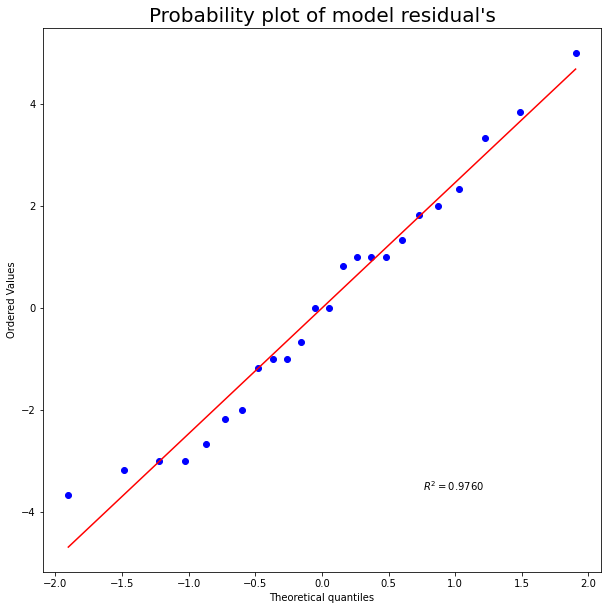

In [28]:
# Residual Analysis
# normal check
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(model.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of model residual's", fontsize= 20)
ax.set

plt.show()

In [29]:
# Homogeneity of Variance check
# Levene() method

stats.levene(df['Strength'][df['Conc'] == 5],
             df['Strength'][df['Conc'] == 10],
             df['Strength'][df['Conc'] == 15],
             df['Strength'][df['Conc'] == 20])

LeveneResult(statistic=0.5988455988455988, pvalue=0.6231941028644978)

The p value of the Levene is very large. We don't have evidence to conclude that the variances from different hardwood concentration are different

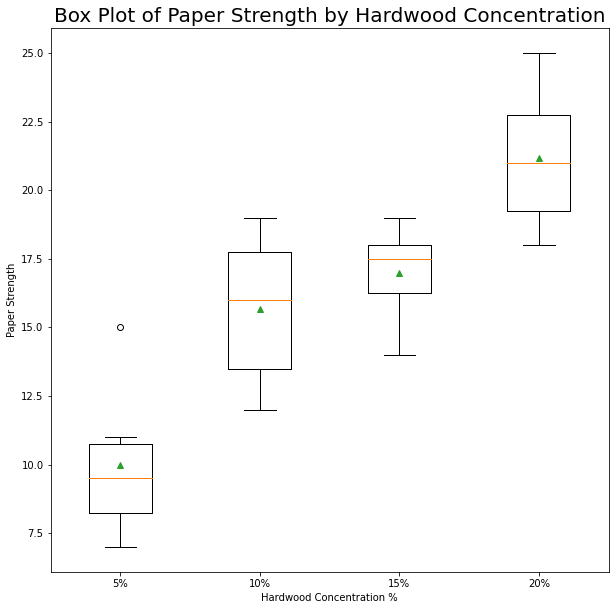

In [31]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of Paper Strength by Hardwood Concentration", fontsize= 20)
ax.set

data2 = [df['Strength'][df['Conc'] == 5],
             df['Strength'][df['Conc'] == 10],
             df['Strength'][df['Conc'] == 15],
             df['Strength'][df['Conc'] == 20]]

ax.boxplot(data2,
           labels= ['5%', '10%', '15%', '20%'],
           showmeans= True)

plt.xlabel("Hardwood Concentration %")
plt.ylabel("Paper Strength")

plt.show()

In [40]:
# the data structure of data2
print(data2)

[0     7
1     8
2    15
3    11
4     9
5    10
Name: Strength, dtype: int64, 6     12
7     17
8     13
9     18
10    19
11    15
Name: Strength, dtype: int64, 12    14
13    18
14    19
15    17
16    16
17    18
Name: Strength, dtype: int64, 18    19
19    25
20    22
21    23
22    18
23    20
Name: Strength, dtype: int64]


In [34]:
# Multiple comparison test 
# ref https://www.statsmodels.org/devel/generated/statsmodels.sandbox.stats.multicomp.MultiComparison.html 
#Tukey Honestly Significat Difference (HSD)
comp = mc.MultiComparison(df['Strength'], df['Conc'])
post_hoc_res = comp.tukeyhsd()
post_hoc_res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
5,10,5.6667,0.0051,1.5439,9.7894,True
5,15,7.0,0.001,2.8773,11.1227,True
5,20,11.1667,0.001,7.0439,15.2894,True
10,15,1.3333,0.7827,-2.7894,5.4561,False
10,20,5.5,0.0066,1.3773,9.6227,True
15,20,4.1667,0.047,0.0439,8.2894,True


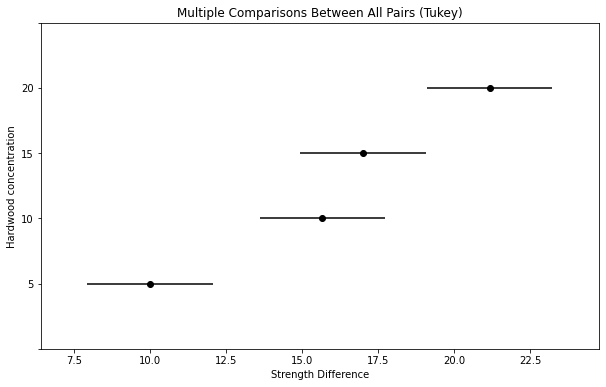

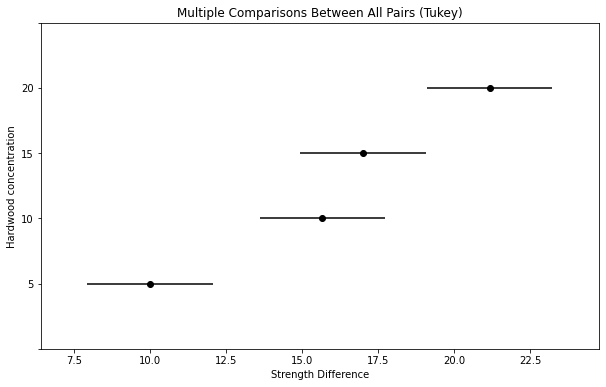

In [35]:
#visualize the Tukey test
post_hoc_res.plot_simultaneous(ylabel= "Hardwood concentration", xlabel= "Strength Difference")